In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy import optimize as opt


In [2]:
# Params
a = 1
b = 1
A_p = 314
j = 10**2
K_d = 0.74
K_m = 2.5
k = j/K_d
V_m = 8.8 * 10**3
V = 523
W = 32
y = 0.000083
z = .002
f = 0.1
A_e = 47
g = 0.1


S_e = 0.1

In [3]:
def bisect_S(P, P_b, P_u, E, E_b, E_u):
    S = np.linspace(0,20, 10000)
    dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S) + (A_e/V)*E(S)) + (j+a)*((A_p/V)*P_b(S) + (A_e/V)*E_b(S)) - V_m*S / (V*(K_m +S))
    plt.plot(S, dSdt(S))
    plt.ylim((-1,1))
    plt.axhline(y=0, color='r')
    plt.xlabel("S")
    plt.ylabel(r"$\frac{dS}{dt}$")
    plt.legend(["Uracil", "y=0"])
    plt.show()

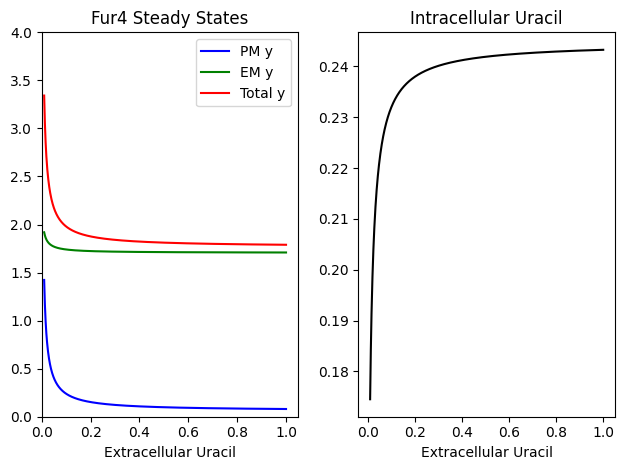

In [9]:
#Varying Extracellular Uracil
constant = 1000
S_es = np.linspace(0.01,1,constant)
fig,ax = plt.subplots(1,2)

#Normal P_u -> E plotting
if False:
    S_steady = []
    P_steady = []
    P_b_steady = []
    P_u_steady = []
    E_steady = []
    E_b_steady = []
    E_u_steady = []
    #Steady State Equations
    P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S*a**2*k*z)
    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_p**2*S*a*g*k*z)
    E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (W*a*b*y + W*a*y*z + W*b*j*y + W*j*y*z)/(S*a*k*z)
    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (b*y + y*z)/(a*z)
    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: y/z
    for S_extra in S_es:

        # bisect_S(P, P_b, P_u, E, E_b, E_u)
        dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra)) - V_m*S / (V*(K_m +S))
        num1 = 0.01
        num2 = 10
        root = opt.bisect(dSdt, num1, num2)
        S_steady.append(root)

        P_steady.append(P(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_b_steady.append(P_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_u_steady.append(P_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_steady.append(E(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_b_steady.append(E_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_u_steady.append(E_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))

    S_steady = np.array(S_steady)
    P_steady = np.array(P_steady)
    P_b_steady = np.array(P_b_steady)
    P_u_steady = np.array(P_u_steady)
    E_steady = np.array(E_steady)
    E_b_steady = np.array(E_b_steady)
    E_u_steady = np.array(E_u_steady)



    # Plotting

    PM = P_steady + P_b_steady + P_u_steady
    EM = E_steady + E_b_steady + E_u_steady
    All = PM+EM

    ax[0].plot(S_es,PM,'b',label = "PM y/(1+S)")
    ax[0].plot(S_es,EM,'g',label = "EM y/(1+S)")
    ax[0].plot(S_es,All,'r',label = "Total y/(1+S)")
    ax[0].set_xlabel("Extracellular Uracil")
    ax[0].set_title("Fur4 Steady States")
    ax[0].legend()
    ax[0].axis(ymin=0,ymax=4,xmin=0)

    ax[1].plot(S_es,S_steady,'k')
    ax[1].set_title("Intracellular Uracil")
    ax[1].set_xlabel("Extracellular Uracil")


#y/S plotting
if False:
    S_steady = []
    P_steady = []
    P_b_steady = []
    P_u_steady = []
    E_steady = []
    E_b_steady = []
    E_u_steady = []
    #Steady State Equations
    P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_e*S**2*W*a**2*f*k*z + A_e*S**2*W*a*f*j*k*z + A_e*S*S_e*W**2*a**2*f*k*z + A_e*S*S_e*W**2*a*f*j*k*z + A_p*S**3*a**2*k**2*z + A_p*S**2*S_e*W*a**2*k**2*z)
    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_e*S*W*a**2*f*z + A_e*S*W*a*f*j*z + A_p*S**2*a**2*k*z)
    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_e*A_p*S*W*a*f*g*z + A_e*A_p*S*W*f*g*j*z + A_p**2*S**2*a*g*k*z)
    E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  (A_p*W*a*b*y + A_p*W*b*j*y)/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_p*S**2*a*k*z)
    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  A_p*b*k*y/(A_e*W*a*f*z + A_e*W*f*j*z + A_p*S*a*k*z)
    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  y/(S*z)
    for S_extra in S_es:

        # bisect_S(P, P_b, P_u, E, E_b, E_u)
        dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra)) - V_m*S / (V*(K_m +S))
        root = opt.bisect(dSdt, 0.01, 10)
        S_steady.append(root)

        P_steady.append(P(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_b_steady.append(P_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_u_steady.append(P_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_steady.append(E(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_b_steady.append(E_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_u_steady.append(E_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))

    S_steady = np.array(S_steady)
    P_steady = np.array(P_steady)
    P_b_steady = np.array(P_b_steady)
    P_u_steady = np.array(P_u_steady)
    E_steady = np.array(E_steady)
    E_b_steady = np.array(E_b_steady)
    E_u_steady = np.array(E_u_steady)



    # Plotting

    PM = P_steady + P_b_steady + P_u_steady
    EM = E_steady + E_b_steady + E_u_steady
    All = PM+EM

    ax[0].plot(S_es,PM,'b--',label = "PM y/S")
    ax[0].plot(S_es,EM,'g--',label = "EM y/S")
    ax[0].plot(S_es,All,'r--',label = "Total y/S")
    ax[0].set_xlabel("Extracellular Uracil")
    ax[0].set_title("Fur4 Steady States")
    ax[0].legend()
    ax[0].axis(ymin=0,ymax=4,xmin=0)

    ax[1].plot(S_es,S_steady,'k--')
    ax[1].set_title("Intracellular Uracil")
    ax[1].set_xlabel("Extracellular Uracil")


#y plotting
if True:
    S_steady = []
    P_steady = []
    P_b_steady = []
    P_u_steady = []
    E_steady = []
    E_b_steady = []
    E_u_steady = []
    #Steady State Equations
    P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_e*S*W*a**2*f*k*z + A_e*S*W*a*f*j*k*z + A_e*S_e*W**2*a**2*f*k*z + A_e*S_e*W**2*a*f*j*k*z + A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_e*W*a**2*f*z + A_e*W*a*f*j*z + A_p*S*a**2*k*z)
    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_e*A_p*W*a*f*g*z + A_e*A_p*W*f*g*j*z + A_p**2*S*a*g*k*z)
    E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  (A_p*W*a*b*y + A_p*W*b*j*y)/(A_e*W*a*f*z + A_e*W*f*j*z + A_p*S*a*k*z)
    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  A_p*S*b*k*y/(A_e*W*a*f*z + A_e*W*f*j*z + A_p*S*a*k*z)
    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e:  y/z
    for S_extra in S_es:

        # bisect_S(P, P_b, P_u, E, E_b, E_u)
        dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra)) - V_m*S / (V*(K_m +S))
        root = opt.bisect(dSdt, 0.01, 10)
        S_steady.append(root)

        P_steady.append(P(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_b_steady.append(P_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_u_steady.append(P_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_steady.append(E(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_b_steady.append(E_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_u_steady.append(E_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_extra))

    S_steady = np.array(S_steady)
    P_steady = np.array(P_steady)
    P_b_steady = np.array(P_b_steady)
    P_u_steady = np.array(P_u_steady)
    E_steady = np.array(E_steady)
    E_b_steady = np.array(E_b_steady)
    E_u_steady = np.array(E_u_steady)



    # Plotting

    PM = P_steady + P_b_steady + P_u_steady
    EM = E_steady + E_b_steady + E_u_steady
    All = PM+EM

    # fig,ax = plt.subplots(1,2)
    ax[0].plot(S_es,PM,'b',label = "PM y")
    ax[0].plot(S_es,EM,'g',label = "EM y")
    ax[0].plot(S_es,All,'r',label = "Total y")
    ax[0].set_xlabel("Extracellular Uracil")
    ax[0].set_title("Fur4 Steady States")
    ax[0].legend()
    ax[0].axis(ymin=0,ymax=4,xmin=0)

    ax[1].plot(S_es,S_steady,'k')
    ax[1].set_title("Intracellular Uracil")
    ax[1].set_xlabel("Extracellular Uracil")

plt.tight_layout()
plt.show()

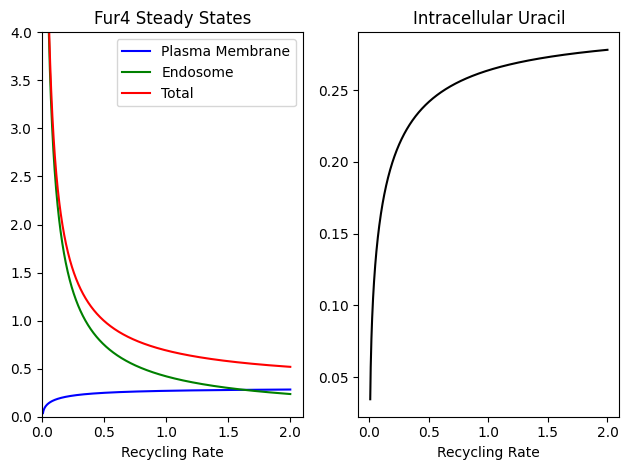

In [5]:
#Varying Recycling Rate
constant = 1000
fs = np.linspace(0.001,1,constant)

S_steady = []
P_steady = []
P_b_steady = []
P_u_steady = []
E_steady = []
E_b_steady = []
E_u_steady = []
#Steady State Equations
P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_e*S**2*W*a**2*f*k*z + A_e*S**2*W*a*f*j*k*z + A_e*S*S_e*W**2*a**2*f*k*z + A_e*S*S_e*W**2*a*f*j*k*z + A_e*S*W*a**2*f*k*z + A_e*S*W*a*f*j*k*z + A_e*S_e*W**2*a**2*f*k*z + A_e*S_e*W**2*a*f*j*k*z + A_p*S**3*a**2*k**2*z + A_p*S**2*S_e*W*a**2*k**2*z + A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_e*S*W*a**2*f*z + A_e*S*W*a*f*j*z + A_e*W*a**2*f*z + A_e*W*a*f*j*z + A_p*S**2*a**2*k*z + A_p*S*a**2*k*z)
P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_e*A_p*S*W*a*f*g*z + A_e*A_p*S*W*f*g*j*z + A_e*A_p*W*a*f*g*z + A_e*A_p*W*f*g*j*z + A_p**2*S**2*a*g*k*z + A_p**2*S*a*g*k*z)
E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_p*W*a*b*y + A_p*W*b*j*y)/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_e*W*a*f*z + A_e*W*f*j*z + A_p*S**2*a*k*z + A_p*S*a*k*z)
E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: A_p*S*b*k*y/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_e*W*a*f*z + A_e*W*f*j*z + A_p*S**2*a*k*z + A_p*S*a*k*z)
E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: y/(S*z + z)
for f_new in fs:

    # bisect_S(P, P_b, P_u, E, E_b, E_u)
    dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e)) - V_m*S / (V*(K_m +S))
    root = opt.bisect(dSdt, 0.01, 10)
    S_steady.append(root)

    P_steady.append(P(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    P_b_steady.append(P_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    P_u_steady.append(P_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    E_steady.append(E(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    E_b_steady.append(E_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    E_u_steady.append(E_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))

S_steady = np.array(S_steady)
P_steady = np.array(P_steady)
P_b_steady = np.array(P_b_steady)
P_u_steady = np.array(P_u_steady)
E_steady = np.array(E_steady)
E_b_steady = np.array(E_b_steady)
E_u_steady = np.array(E_u_steady)


# Plotting

PM = P_steady + P_b_steady + P_u_steady
EM = E_steady + E_b_steady + E_u_steady
All = PM+EM

fig,ax = plt.subplots(1,2)
ax[0].plot(S_es,PM,'b',label = "Plasma Membrane")
ax[0].plot(S_es,EM,'g',label = "Endosome")
ax[0].plot(S_es,All,'r',label = "Total")
ax[0].set_xlabel("Recycling Rate")
ax[0].set_title("Fur4 Steady States")
ax[0].legend()
ax[0].axis(ymin=0,ymax=4,xmin=0)

ax[1].plot(S_es,S_steady,'k')
ax[1].set_title("Intracellular Uracil")
ax[1].set_xlabel("Recycling Rate")

plt.tight_layout()
plt.show()


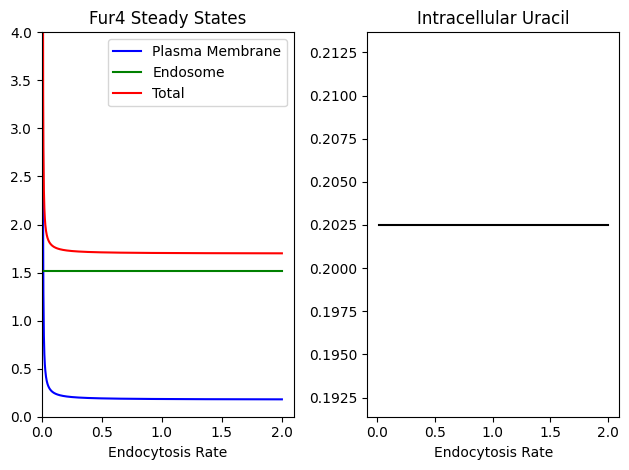

In [6]:
#Varying Endocytosis Rate
constant = 1000
gs = np.linspace(0.001,1,constant)

S_steady = []
P_steady = []
P_b_steady = []
P_u_steady = []
E_steady = []
E_b_steady = []
E_u_steady = []
#Steady State Equations
P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_e*S**2*W*a**2*f*k*z + A_e*S**2*W*a*f*j*k*z + A_e*S*S_e*W**2*a**2*f*k*z + A_e*S*S_e*W**2*a*f*j*k*z + A_e*S*W*a**2*f*k*z + A_e*S*W*a*f*j*k*z + A_e*S_e*W**2*a**2*f*k*z + A_e*S_e*W**2*a*f*j*k*z + A_p*S**3*a**2*k**2*z + A_p*S**2*S_e*W*a**2*k**2*z + A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_e*S*W*a**2*f*z + A_e*S*W*a*f*j*z + A_e*W*a**2*f*z + A_e*W*a*f*j*z + A_p*S**2*a**2*k*z + A_p*S*a**2*k*z)
P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_e*A_p*S*W*a*f*g*z + A_e*A_p*S*W*f*g*j*z + A_e*A_p*W*a*f*g*z + A_e*A_p*W*f*g*j*z + A_p**2*S**2*a*g*k*z + A_p**2*S*a*g*k*z)
E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_p*W*a*b*y + A_p*W*b*j*y)/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_e*W*a*f*z + A_e*W*f*j*z + A_p*S**2*a*k*z + A_p*S*a*k*z)
E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: A_p*S*b*k*y/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_e*W*a*f*z + A_e*W*f*j*z + A_p*S**2*a*k*z + A_p*S*a*k*z)
E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: y/(S*z + z)
for g_new in fs:

    # bisect_S(P, P_b, P_u, E, E_b, E_u)
    dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e)) - V_m*S / (V*(K_m +S))
    root = opt.bisect(dSdt, 0.1, 10)
    S_steady.append(root)

    P_steady.append(P(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    P_b_steady.append(P_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    P_u_steady.append(P_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    E_steady.append(E(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    E_b_steady.append(E_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    E_u_steady.append(E_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))

S_steady = np.array(S_steady)
P_steady = np.array(P_steady)
P_b_steady = np.array(P_b_steady)
P_u_steady = np.array(P_u_steady)
E_steady = np.array(E_steady)
E_b_steady = np.array(E_b_steady)
E_u_steady = np.array(E_u_steady)


# Plotting

PM = P_steady + P_b_steady + P_u_steady
EM = E_steady + E_b_steady + E_u_steady
All = PM+EM

fig,ax = plt.subplots(1,2)
ax[0].plot(S_es,PM,'b',label = "Plasma Membrane")
ax[0].plot(S_es,EM,'g',label = "Endosome")
ax[0].plot(S_es,All,'r',label = "Total")
ax[0].set_xlabel("Endocytosis Rate")
ax[0].set_title("Fur4 Steady States")
ax[0].legend()
ax[0].axis(ymin=0,ymax=4,xmin=0)

ax[1].plot(S_es,S_steady,'k')
ax[1].set_title("Intracellular Uracil")
ax[1].set_xlabel("Endocytosis Rate")

plt.tight_layout()
plt.show()
